In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import keras
from keras.applications.resnet50 import ResNet50

resnet_model = ResNet50(weights="imagenet")

Using TensorFlow backend.
c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\users\etsukerman\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qi

Instructions for updating:
Colocations handled automatically by placer.


<IPython.core.display.Javascript object>

In [3]:
import foolbox
import numpy as np

<IPython.core.display.Javascript object>

In [4]:
preprocessing = dict(flip_axis=-1, mean=np.array([104, 116, 123]))
fmodel = foolbox.models.KerasModel(
    resnet_model, bounds=(0, 255), preprocessing=preprocessing
)

Instructions for updating:
Use tf.cast instead.


<IPython.core.display.Javascript object>

In [5]:
image, label = foolbox.utils.imagenet_example()

<IPython.core.display.Javascript object>

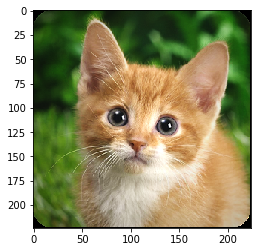

<IPython.core.display.Javascript object>

In [6]:
import matplotlib.pyplot as plt

%matplotlib inline
imgplot = plt.imshow(image / 255)

In [7]:
print("Label", np.argmax(fmodel.forward_one(image)))

Label 282


<IPython.core.display.Javascript object>

In [8]:
attack = foolbox.v1.attacks.FGSM(fmodel)

<IPython.core.display.Javascript object>

In [9]:
adversarial = attack(image, label)

<IPython.core.display.Javascript object>

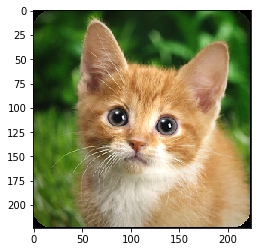

<IPython.core.display.Javascript object>

In [10]:
imgplot = plt.imshow(adversarial / 255)

In [11]:
print("Label", np.argmax(fmodel.forward_one(adversarial)))

Label 281


<IPython.core.display.Javascript object>